## Rough Data Processing
Just made this notebook for rough data processing and visualizing how the data looked like. 

In [81]:
# imports
import pandas as pd
import matplotlib

In [82]:
# file names
ca_hospital_csv = "../data/california_hospital_data.csv"
cases_county_csv = "../data/us-counties.csv"

In [83]:
# load csvs
ca_hospital_df = pd.read_csv(ca_hospital_csv)
cases_county_df = pd.read_csv(cases_county_csv)

In [84]:
# initial data processing

# make all strings uppercase for easier equality eval
cases_county_df['county'] = cases_county_df['county'].str.upper()
cases_county_df['state'] = cases_county_df['state'].str.upper()


In [85]:
# generate number of beds by county
beds_by_county_by_bed_type_df = ca_hospital_df.groupby(['COUNTY_NAME', 'BED_CAPACITY_TYPE'])[['BED_CAPACITY']].agg('sum').reset_index()
beds_by_county_df = beds_by_county_by_bed_type_df.groupby(['COUNTY_NAME'])[['BED_CAPACITY']].agg('sum').reset_index()

5476


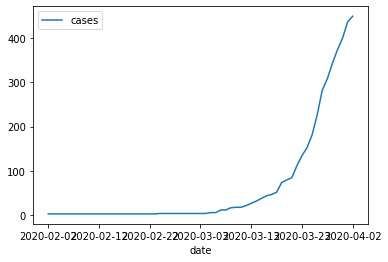

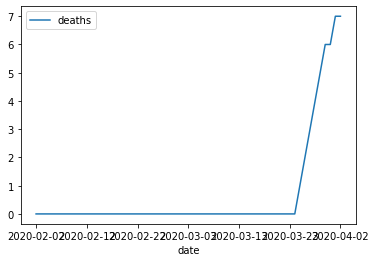

In [91]:
sf_df = cases_county_df.loc[cases_county_df['county'] == 'SAN FRANCISCO']
sf_df.plot('date', 'cases')
sf_df.plot('date', 'deaths')
print(beds_by_county_df.loc[beds_by_county_df['COUNTY_NAME'] == 'SAN FRANCISCO']['BED_CAPACITY'].sum())